# Chapter 4 - Clustering Models
## Segment 1 - K-means method
### Setting up for clustering analysis

### Background 
    1. need to scale the variables 
    2. better to make scatter plot and estminate a number of centroids

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [5]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [11]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
print(y.shape)
print(variable_names)
print(X[0:10])

(150, 1)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [12]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


## Building and running your model

In [16]:
clustering = KMeans( n_clusters = 3, random_state = 5)
#we know we want to make 3 clusters 
clustering.fit(X)


KMeans(n_clusters=3, random_state=5)

## Plotting your model outputs

In [18]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

(150,)
(150,)
(150,)


Text(0.5, 1.0, 'K-Means Classification')

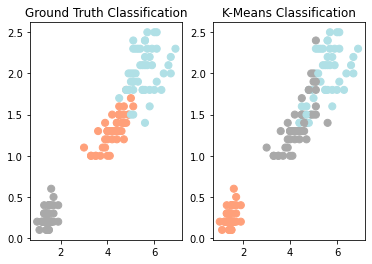

In [30]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
#one row and 2 columns for the plot arragement, the 3rd param is position 
#Let the first plot to be at the 1st position

plt.scatter(x=iris_df.Petal_Length, 
            y=iris_df.Petal_Width, 
            c=color_theme[iris.target], s=50)
print(iris_df.Petal_Length.shape)
print(iris_df.Petal_Width.shape)
print(iris.target.shape)
#there are 150 data points, each with petal len, wid and a group classification
#make the scatter points plotted by their len, wid 
#with each points' color repr their classification 

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
#sec subplot to be at 2nd position 

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')


Text(0.5, 1.0, 'K-Means Classification')

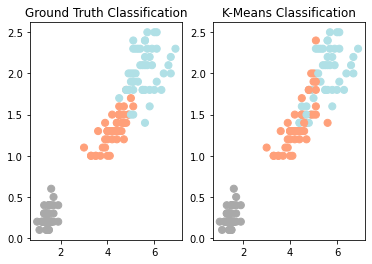

In [45]:
#the clustering looks good but color labels are not corresponding with each other 
#use relabel
relabel = np.choose(clustering.labels_, [1,0,2]).astype(np.int64)
#KMean obj's labels_ field is a ndarray with the same dimension of data points 
#as we have 3 labels in clustering.labels_, 
#choose(a, choice) function should have len(choice) = 3 
#we see that we have the first 2 colors inverted, so we redo the mapping 
#map from [0,1,2] to [1,0,2]

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
#original plot still the same color 

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')
#k-mean plot use the relabel color 

In [44]:
# print(clustering.labels_)
# relabel2 = np.choose(clustering.labels_, [2,3,4,5,6])
# print(relabel2)

## Evaluate your clustering results

In [46]:
print(classification_report(y, relabel))
#we want high preicsion and high recall 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

